# Processing of the Fashion MNIST Dataset from Zalando Research

In [1]:
%matplotlib inline

import keras
from keras.datasets import fashion_mnist
import numpy as np

from matplotlib import pyplot
from matplotlib.pyplot import imshow

Using TensorFlow backend.


The fashion mnist contains 28x28 images from clothing.

In [2]:
# https://github.com/zalandoresearch/fashion-mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

('x_train shape:', (60000, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


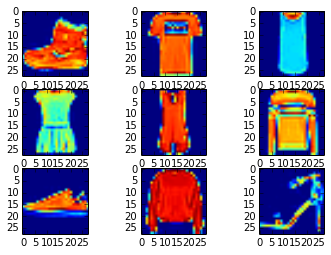

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
image_size = x_train.shape[1]

for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    imshow(x_train[i])
    imgplot = pyplot.imshow(x_train[i])

In [4]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
print y_train.shape
print y_test.shape

(60000,)
(10000,)


Normalize inputs to change their range from [0, 255] to [0, 1].

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

Convert the input matrix from grayscale (image_size, image_size) to single channel (image_size, image_size, 1)

In [7]:
x_train = np.reshape(x_train, (len(x_train), image_size, image_size, 1))
print "Reshaped train to", x_train.shape

x_test = np.reshape(x_test, (len(x_test), image_size, image_size, 1))
print "Reshaped test to", x_test.shape

Reshaped train to (60000, 28, 28, 1)
Reshaped test to (10000, 28, 28, 1)


Convert the class vectors to binary class matrices (i.e., using one-hot encoding).

In [8]:
from keras.utils import np_utils

print "num y_train classes", y_train.shape
y_train = np_utils.to_categorical(y_train)
print "num y_train encoded classes", y_train.shape[1]

print "num y_test classes", y_test.shape
y_test = np_utils.to_categorical(y_test)
print "num y_test encoded classes", y_test.shape[1]

num_classes = y_test.shape[1]
print "num_classes", num_classes

num y_train classes (60000,)
num y_train encoded classes 10
num y_test classes (10000,)
num y_test encoded classes 10
num_classes 10


In [9]:
print x_train.shape
print y_train.shape

(60000, 28, 28, 1)
(60000, 10)


## Classification of fashion MNIST usind deep convolutional neural networks

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, rmsprop
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [12]:
model = Sequential()
# stage 1
print "Creating net with input", x_train.shape[1:]
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(Dropout(0.25))
# stage 2
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# stage 3
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# stage 4
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# stage 5
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
# stage 6
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
# stage 7
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
# stage 8
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
# stage 9
model.add(Dense(num_classes, activation='softmax'))

Creating net with input (28, 28, 1)


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [14]:
# see: https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py
from keras.preprocessing.image import ImageDataGenerator

def get_img_generator():
    return ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [15]:
epochs = 50
batch_size= 64
seed = 1234

In [16]:
np.random.seed(seed)

datagen = get_img_generator()
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    shuffle=True,
                    validation_data=(x_test, y_test),
                    workers=6)

Epoch 1/50
938/938 [==============================] - 157s 168ms/step - loss: 0.8426 - acc: 0.6721 - val_loss: 0.5816 - val_acc: 0.7677
Epoch 2/50
938/938 [==============================] - 156s 167ms/step - loss: 0.5701 - acc: 0.7816 - val_loss: 0.4510 - val_acc: 0.8263
Epoch 3/50
938/938 [==============================] - 149s 159ms/step - loss: 0.5095 - acc: 0.8081 - val_loss: 0.4211 - val_acc: 0.8541
Epoch 4/50
938/938 [==============================] - 154s 164ms/step - loss: 0.4609 - acc: 0.8268 - val_loss: 0.3679 - val_acc: 0.8622
Epoch 5/50
938/938 [==============================] - 152s 162ms/step - loss: 0.4373 - acc: 0.8392 - val_loss: 0.3323 - val_acc: 0.8815
Epoch 6/50
938/938 [==============================] - 153s 163ms/step - loss: 0.4185 - acc: 0.8458 - val_loss: 0.3434 - val_acc: 0.8759
Epoch 7/50
938/938 [==============================] - 152s 162ms/step - loss: 0.4029 - acc: 0.8542 - val_loss: 0.3204 - val_acc: 0.8840
Epoch 8/50
938/938 [============================

KeyboardInterrupt: 

In [17]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.46%
